In [30]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)

In [31]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"

In [32]:
tags = pd.read_csv(f"{csv_folder}/tags.csv", index_col=0)
tags.Date = pd.to_datetime(tags.Date)
tags["month"] = tags.Date.dt.month
tags["year"] = tags.Date.dt.year
tags.head()

,Tag,Sha,Date,Tag_number,month,year
0,latest-silver-master-#65,639ab0ae52d143cf8b8b82c009c95e69ed2d40d7,2015-01-30 10:12:28,latest-silver-master-#65,1,2015
1,8.4.2.36762,2de1f343e3dbd9e88007b42e475512677c04eb8a,2020-08-27 14:11:31,8.4.2.36762,8,2020
2,8.4.1.35646,a0d372f704998d38856c26e28662fd7de062f873,2020-07-14 08:13:18,8.4.1.35646,7,2020
3,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,8.4.0.35506,7,2020
4,8.3.1.34397,b77ce511a2039330aea8832ad12e86a8cfa9ff7d,2020-05-07 12:09:22,8.3.1.34397,5,2020


### Shape

In [33]:
tags.shape

(186, 6)

### Columns

In [34]:
tags.columns

Index(['Tag', 'Sha', 'Date', 'Tag_number', 'month', 'year'], dtype='object')

### Statistical summary

In [35]:
tags.describe()

,month,year
count,186.000000,186.000000
mean,5.924731,2015.467742
std,3.669411,2.166460
min,1.000000,2011.000000
25%,2.000000,2014.000000
50%,6.000000,2016.000000
75%,9.000000,2017.000000
max,12.000000,2020.000000


**Distribution over the years**

<AxesSubplot:xlabel='year', ylabel='Tag'>

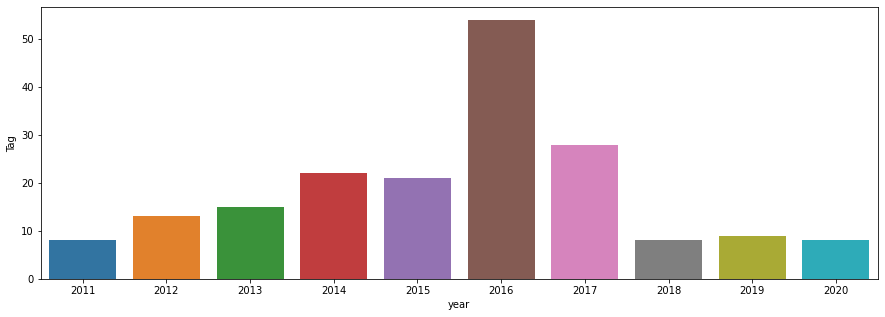

In [36]:
sns.barplot(x="year", y="Tag", data=tags.groupby("year").Tag.count().reset_index())

**Filter the ones after the project started using TravisCI**

In [37]:
tags = tags[tags.Date > "2015-03-10"]

In [39]:
tags.Tag.nunique()

120

**Distribution overtime of the releases**

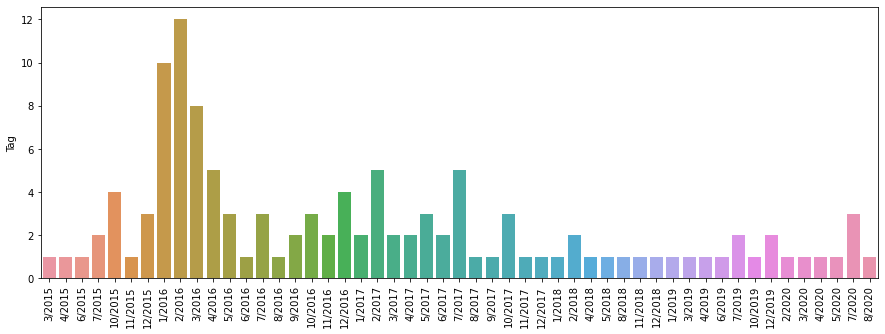

In [42]:
time_group = ["year", "month"]
x = tags.groupby(time_group).Tag.count().reset_index()
ax = sns.barplot(x=x.index, y=x.Tag)
ax.set_xticklabels(list(x[time_group[1]].astype(int).astype(str) + "/" + x[time_group[0]].astype(int).astype(str)),
                      rotation=90)
plt.show()

**Major version counts**

In [47]:
tags.major_version = tags.Tag.apply(lambda s: s.split(".")[0])

Text(0, 0.5, 'Tags')

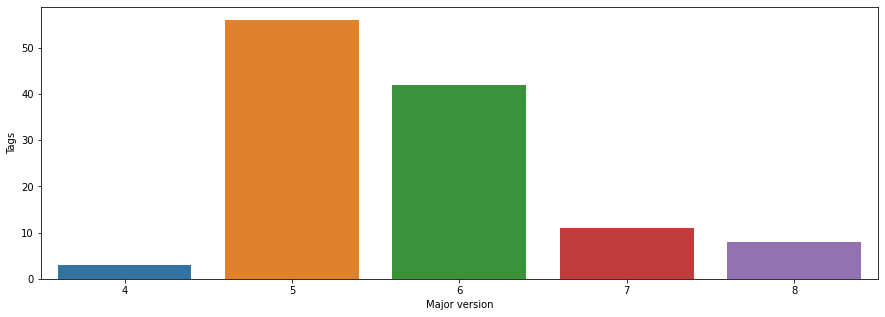

In [53]:
ax = sns.countplot(tags.major_version)
ax.set_xlabel("Major version")
ax.set_ylabel("Tags")